# Example of unconstrained mimimization

## Solving a simple problem

In [1]:
using Polyopt


We define two variables $x$ and $z$,

In [2]:
x, z = variables(["x", "z"]);

and the function $f(x,z)=4 x^2 + xz - 4z^2 - \frac{21}{10}x^4 + 4z^4 + \frac{1}{3}x^6$.

In [3]:
f = 4*x^2 + x*z - 4*z^2 - 21//10*x^4 + 4*z^4 + 1//3*x^6;

To minimize $f(x,z)$ we form a moment relaxation of order 3,

In [4]:
prob = momentprob(3, f);

and we solve it,

In [5]:
X, Z, t, y, solsta = solve_mosek(prob);

Open file 'polyopt.task'
Problem
  Name                   :                 
  Objective sense        : max             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 28              
  Cones                  : 0               
  Scalar variables       : 1               
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Conic interior-point optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 28
Optimize

The optimal lower bound is

In [6]:
t

-1.0316284539389016

If an optimal polynomial solution is found, then $y$ corresponds to the monomial basis vector

In [7]:
[prob.basis y]

28×2 Array{Polyopt.Poly{Float64},2}:
 1.0      1.0         
 z        1.08844e-15 
 z^2      0.507879    
 z^3      5.52799e-16 
 z^4      0.257941    
 z^5      2.80756e-16 
 z^6      2.36641     
 x        -1.37211e-16
 x*z      -0.0640266  
 x*z^2    -6.96865e-17
 x*z^3    -0.0325178  
 x*z^4    -3.53924e-17
 x*z^5    -0.015141   
 ⋮                    
 x^2*z^3  4.4616e-18  
 x^2*z^4  0.00398069  
 x^3      -1.10742e-18
 x^3*z    -0.000516801
 x^3*z^2  -5.62436e-19
 x^3*z^3  -0.000261382
 x^4      6.51621e-5  
 x^4*z    7.0902e-20  
 x^4*z^2  3.48475e-5  
 x^5      -8.94521e-21
 x^5*z    -4.18194e-6 
 x^6      5.64597e-7  

Because of multiple global minima of $f(x,z)$ this is not the case.

## Perturbing the problem to find global minimum

 We perturb $f(x,z)$ to find a global minimizer,

In [8]:
fp = f + 1e-4*(x+z)

0.0001*z-4.0*z^2+4.0*z^4+0.0001*x+x*z+4.0*x^2-2.1*x^4+0.3333333333333333*x^6

In [9]:
probp = momentprob(3, fp);

In [10]:
Xp, Zp, tp, yp, solsta = solve_mosek(probp);

Open file 'polyopt.task'
Problem
  Name                   :                 
  Objective sense        : max             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 28              
  Cones                  : 0               
  Scalar variables       : 1               
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Conic interior-point optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 28
Optimize

We get (approximately) the same optimal lower bound

In [11]:
tp

-1.0316907358084793

In [12]:
[probp.basis yp]

28×2 Array{Polyopt.Poly{Float64},2}:
 1.0      1.0         
 z        -0.712658   
 z^2      0.507887    
 z^3      -0.36195    
 z^4      0.257949    
 z^5      -0.18383    
 z^6      1.9197      
 x        0.0898295   
 x*z      -0.0640184  
 x*z^2    0.0456232   
 x*z^3    -0.0325141  
 x*z^4    0.0231714   
 x*z^5    -0.0154089  
 ⋮                    
 x^2*z^3  -0.00292072 
 x^2*z^4  0.00362935  
 x^3      0.000724871 
 x^3*z    -0.000516593
 x^3*z^2  0.000368153 
 x^3*z^3  -0.000261445
 x^4      6.5123e-5   
 x^4*z    -4.64051e-5 
 x^4*z^2  3.45183e-5  
 x^5      5.84929e-6  
 x^5*z    -4.17533e-6 
 x^6      5.513e-7    

Now we have found a global minimizer, and can we verify optimality by evaluating $f(x,z)$ at that point

In [13]:
xo = [yp[8], yp[2]]

2-element Array{Float64,1}:
  0.0898295
 -0.712658 

In [14]:
Polyopt.evalpoly(f, xo)

-1.0316284528263742

## Plotting the solution

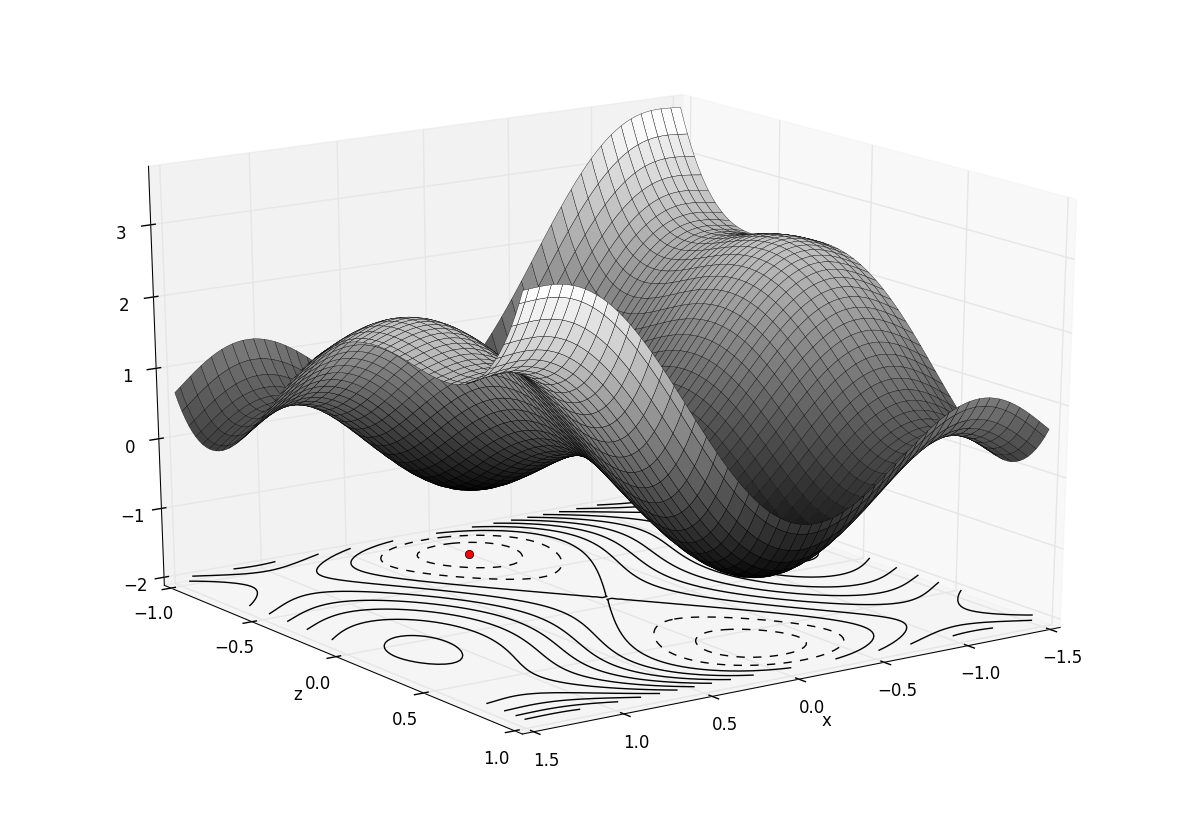

PyObject <matplotlib.text.Text object at 0x7f7d3cbdc6d0>

In [15]:
using PyPlot

n = 100
X = linspace(-1.5, 1.5, n)
Z = linspace(-1, 1, n)

Xgrid = repmat(X',n,1)
Zgrid = repmat(Z,1,n)
T = zeros(n,n)

for i in 1:n
    for j in 1:n
        T[i:i,j:j] = Polyopt.evalpoly(f, [X[j];Z[i]])
    end
end

fig = figure(figsize=(15,10))
ax = fig[:gca](projection = "3d") 
ax[:plot_surface](Xgrid, Zgrid, T, rstride=2, edgecolors="k", cstride=2, cmap=ColorMap("gray"), linewidth=0.25)
ax[:view_init](20.0, 55.0)
ax[:contour](Xgrid, Zgrid, T, 15, offset=-2.0, colors="black")
ax[:plot]( [xo[1]], [xo[2]], -2.0, "ro")
xlabel("x") 
ylabel("z")


## Inspecting problem data and validating solutions

The monomial basis vector defining the problem stored is stored in <code>prob.basis</code>,

In [16]:
prob.basis

  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/joachim/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/joachim/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/joachim/.julia/v0.5/PyCall/sr

28-element Array{Polyopt.Poly{Int64},1}:
 1      
 z      
 z^2    
 z^3    
 z^4    
 z^5    
 z^6    
 x      
 x*z    
 x*z^2  
 x*z^3  
 x*z^4  
 x*z^5  
 ⋮      
 x^2*z^3
 x^2*z^4
 x^3    
 x^3*z  
 x^3*z^2
 x^3*z^3
 x^4    
 x^4*z  
 x^4*z^2
 x^5    
 x^5*z  
 x^6    

The coefficients for $f$ are stored in <code>prob.obj</code>,

In [17]:
dot(prob.obj, prob.basis)

-4//1*z^2+4//1*z^4+x*z+4//1*x^2-21//10*x^4+1//3*x^6

The symmetric matrices defining the moment matrix are stored in <code>prob.mom[1]</code> column by column,

In [18]:
size(prob.mom[1])

(100,28)

In [19]:
reshape(prob.mom[1]*prob.basis, 10, 10)

10×10 Array{Polyopt.Poly{Int64},2}:
 1      z        z^2      z^3      …  x*z^2    x^2      x^2*z    x^3    
 z      z^2      z^3      z^4         x*z^3    x^2*z    x^2*z^2  x^3*z  
 z^2    z^3      z^4      z^5         x*z^4    x^2*z^2  x^2*z^3  x^3*z^2
 z^3    z^4      z^5      z^6         x*z^5    x^2*z^3  x^2*z^4  x^3*z^3
 x      x*z      x*z^2    x*z^3       x^2*z^2  x^3      x^3*z    x^4    
 x*z    x*z^2    x*z^3    x*z^4    …  x^2*z^3  x^3*z    x^3*z^2  x^4*z  
 x*z^2  x*z^3    x*z^4    x*z^5       x^2*z^4  x^3*z^2  x^3*z^3  x^4*z^2
 x^2    x^2*z    x^2*z^2  x^2*z^3     x^3*z^2  x^4      x^4*z    x^5    
 x^2*z  x^2*z^2  x^2*z^3  x^2*z^4     x^3*z^3  x^4*z    x^4*z^2  x^5*z  
 x^3    x^3*z    x^3*z^2  x^3*z^3     x^4*z^2  x^5      x^5*z    x^6    

and similarly the moment matrix evaluated at <code>yp</code> is

In [20]:
M=reshape(prob.mom[1]*yp, 10, 10)

10×10 Array{Float64,2}:
  1.0          -0.712658      0.507887     …  -0.00575074    0.000724871
 -0.712658      0.507887     -0.36195          0.00409835   -0.000516593
  0.507887     -0.36195       0.257949        -0.00292072    0.000368153
 -0.36195       0.257949     -0.18383          0.00362935   -0.000261445
  0.0898295    -0.0640184     0.0456232       -0.000516593   6.5123e-5  
 -0.0640184     0.0456232    -0.0325141    …   0.000368153  -4.64051e-5 
  0.0456232    -0.0325141     0.0231714       -0.000261445   3.45183e-5 
  0.00806942   -0.00575074    0.00409835      -4.64051e-5    5.84929e-6 
 -0.00575074    0.00409835   -0.00292072       3.45183e-5   -4.17533e-6 
  0.000724871  -0.000516593   0.000368153     -4.17533e-6    5.513e-7   

In [21]:
eigvals(Symmetric(M,:L))

10-element Array{Float64,1}:
 -1.68957e-10
 -1.4173e-10 
  4.38308e-10
  8.38848e-9 
  2.57794e-8 
  1.08308e-7 
  3.65932e-6 
  0.00154536 
  1.36203    
  2.33785    

The (primal) solution is a semidefinite matrix

In [22]:
Xp[1]

10×10 Array{Float64,2}:
  1.03169       5.0e-5       -2.02972      …   5.47994e-7    4.0214e-6  
  5.0e-5        0.0594329     6.07455e-10      8.15104e-5   -0.13806    
 -2.02972       6.07455e-10   4.0              4.77109e-8   -8.89282e-6 
 -6.02031e-10  -2.80333e-8    1.2981e-15      -3.24169e-7   -4.65075e-8 
  5.0e-5        0.472077     -7.24992e-5       0.000679789  -1.09785    
  0.027923      7.25144e-5   -0.000114831  …   8.82215e-6   -1.3292e-5  
 -1.52685e-8    0.000115072   1.03555e-8       4.65075e-8   -0.000279106
  0.123203     -0.00013851   -0.226977         1.3292e-5    -1.73857e-12
  5.47994e-7    8.15104e-5    4.77109e-8       0.000558213  -1.3515e-14 
  4.0214e-6    -0.13806      -8.89282e-6      -1.3515e-14    0.333333   

In [23]:
eigvals(Xp[1])

10-element Array{Float64,1}:
 4.38612e-11
 1.86515e-10
 4.15214e-7 
 8.41907e-5 
 0.000554729
 0.0112881  
 0.0372928  
 0.498176   
 4.13501    
 5.04385    

If we store <code>Xp[1]</code> in vectorized form (conforming with <code>prob.mom</code>),

In [24]:
xp = vec(Xp[1])

100-element Array{Float64,1}:
  1.03169    
  5.0e-5     
 -2.02972    
 -6.02031e-10
  5.0e-5     
  0.027923   
 -1.52685e-8 
  0.123203   
  5.47994e-7 
  4.0214e-6  
  5.0e-5     
  0.0594329  
  6.07455e-10
  ⋮          
  0.000558213
 -1.3515e-14 
  4.0214e-6  
 -0.13806    
 -8.89282e-6 
 -4.65075e-8 
 -1.09785    
 -1.3292e-5  
 -0.000279106
 -1.73857e-12
 -1.3515e-14 
  0.333333   

then we can verify that 

In [25]:
prob.mom[1]'*xp - (prob.obj - tp*eye(28,1))

28×1 Array{Float64,2}:
 -6.20195e-10
  0.0001     
  2.24421e-9 
  1.0849e-11 
 -8.04632e-10
  2.5962e-15 
  2.33121e-10
  9.99999e-5 
 -1.3894e-10 
 -1.23082e-10
  1.03252e-10
 -6.033e-14  
 -5.84752e-20
  ⋮          
 -2.88693e-13
  2.33121e-10
  3.30762e-12
 -1.48788e-11
 -2.67517e-11
  2.00574e-16
  4.72436e-10
 -7.60817e-12
  2.33111e-10
 -3.47713e-12
 -2.70301e-14
  1.9911e-10 